# <div style="text-align: center"> Final Exam </div>

#### A website sent advertisements by email to users who are interested in their product. Your task is to find a good model to predict if an advertisement will be clicked with given datasets. 
> ##### user_features.csv - features describing our users <br>
> ##### product_feature.csv - features describing products shown in the advertisements <br>
> ##### click_history.csv - contains which products users had previously seen and whether that user ordered products in this website before. </div>

### <span style = 'color: red'> Question 1: Data Understanding </span>
* Explore the basic information of the datasets; explain what patterns you see in your data exploration and whether it aligns with your model output.

### <span style = 'color:green'> Answer 1: </span>
- <span style = 'color:blue'> The problem statement here is to find a good model that will predict if an advertisement will be clicked or not. Hence this is a classification problem. Therefore, we need to study the provided the 3 CSV files to create a classification model that can predict the outcome with the highest accuracy. In order to understand the dataset better, we need to import some standard libraries and some specific classification related libraries and metrics which will help us in this analysis. </span>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from sklearn import preprocessing, metrics, tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import re
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from graphviz import Source
from sklearn.inspection import permutation_importance

In [6]:
# Loading user_features csv into a dataframe
user_features = pd.read_csv("user_features.csv")
user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  12000 non-null  int64 
 1   number_of_clicks_before  11500 non-null  object
 2   ordered_before           12000 non-null  bool  
 3   personal_interests       12000 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.1+ KB


In [7]:
# Loading product_features csv into a dataframe
product_features = pd.read_csv("product_features.csv")
product_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1000 non-null   int64  
 1   category           1000 non-null   object 
 2   on_sale            1000 non-null   bool   
 3   number_of_reviews  1000 non-null   int64  
 4   avg_review_score   1000 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 32.4+ KB


In [8]:
# Loading click_history csv into a dataframe
click_history = pd.read_csv("click_history.csv")
click_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     35990 non-null  int64
 1   product_id  35990 non-null  int64
 2   clicked     35990 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 597.6 KB


<span style = 'color:blue'> __Observation:__ </span>
* <span style = 'color:blue'> The dataset "user features" provides us with the information about what are the personal preferences of a customer and how many times have had they clicked on the advertisement before the current campaign was launched. But just clicking on the advertisement is not enough if they have not been a prior customer for the company in picture and the ordered before column provides us with that information. Thus, this dataset provides us with information about a customer preference and whether they are more or less likely to buy the product or completely ignore the advertisement.  </span>
* <span style = 'color:blue'> The dataset "product features" provides more details around what are the features of a product and that in correlation with the personal interests of a customer would provide us with the likelihood of buying a product. This dataset also has columns like on sale, number of reviews and average review score as well which could be other determinant factors behind a product selection. </span>
* <span style = 'color:blue'> The last dataset "click history" links the first 2 dataset with the missing information about what are the products that a customer might have clicked. </span>
<br><span style = 'color:blue'> ➡️ Yes the data aligns with a classification model as the column 'clicked' on click history dataset would be the dependent variable that we would predict using the other variables present in other two tables. </span>

---

### <span style = 'color: red'> Question 2: Data Cleaning and Preprocessing </span>
* Clean and preprocess the datasets (such as missing values, outliers, dummy, merging, etc.).

### <span style = 'color:green'> Answer 2: </span>
- <span style = 'color:blue'> In order to clean and process the data, we would have to check for null values in these dataset, check for duplicate records in them and if they are categorical (like clicked, category, on_sale), convert them to numerical so that the models can consume them. Additionally, we would need to check for any column values which has a high variance and try to scale the values in that column so that the model can get trained on a scaled value (between 0 and 1 which is needed for Neural Networks). Additionally, columns like personal interests which are a list have to be converted to dummy variables so that we can get them one hot encoded for the model. </span>

<span style = 'color:blue'> __Data processing of 'User Features' file__</span>

In [14]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  12000 non-null  int64 
 1   number_of_clicks_before  11500 non-null  object
 2   ordered_before           12000 non-null  bool  
 3   personal_interests       12000 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.1+ KB


<span style = 'color:blue'> __Observation:__ We observe that there are 500 null values  in the 'number_of_clicks_before' column. As we do not have any value for those cells, we will fill them with 0 instead </span>

In [16]:
user_features["number_of_clicks_before"] = user_features["number_of_clicks_before"].fillna(0)
# Verify if all null values are removed
user_features.isna().sum() 

user_id                    0
number_of_clicks_before    0
ordered_before             0
personal_interests         0
dtype: int64

In [17]:
# Checking for duplicate user id records
user_features["user_id"].duplicated().sum() # 0 means no duplicate records

0

In [18]:
user_features.head()

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."


<span style = 'color:blue'> __Observation:__ We can now observe the following issues with the data: </span>
* <span style = 'color:blue'> The column 'number of clicks before' has character values as well (6+) and not just numeric. We need to convert any non-numeric character to a numeric one for our model to utilize this data. </span>
* <span style = 'color:blue'> The column 'ordered_before' is in binary whereas models usually run on numeric values. Thus, we need to convert it to numbers.</span>
* <span style = 'color:blue'> The 'personal interests' column is a list of interests that a user has. For us to analyze and understand a user's interests better, we should separate the interests into individual columns. </span>

➡️  <span style = 'color:blue'> We will start with 'number_of_clicks_before' column. </span>

In [21]:
# Fetching the unique values under 'number_of_clicks_before' column
user_features['number_of_clicks_before'].unique()

array(['2', '5', '0', '4', '1', '6+', 0, '3'], dtype=object)

<span style = 'color:blue'> We will update the value '6+' to '7' as 7 is a number greater than 6 and we can use that to standardize the values across the dataframe.</span>

In [23]:
user_features.loc[user_features['number_of_clicks_before'] == '6+', 'number_of_clicks_before'] = 7
user_features['number_of_clicks_before'].unique()

array(['2', '5', '0', '4', '1', 7, 0, '3'], dtype=object)

<span style = 'color:blue'> We see that some values are still characters and have quotes in them whereas some are numbers. We will now convert all the values to numbers. </span>

In [25]:
user_features['number_of_clicks_before'] = pd.to_numeric(user_features['number_of_clicks_before'])
user_features.dtypes

user_id                     int64
number_of_clicks_before     int64
ordered_before               bool
personal_interests         object
dtype: object

➡️ <span style = 'color:blue'> Now we will process the 'ordered_before' column to numeric values (1 = TRUE, 0 = FALSE). </span>

In [27]:
user_features['ordered_before'] = user_features['ordered_before'].astype(int)
user_features.dtypes

user_id                     int64
number_of_clicks_before     int64
ordered_before              int32
personal_interests         object
dtype: object

➡️ <span style = 'color:blue'> Now we will process the 'personal_interests' interest values to dummy variables. </span>

In [29]:
# finding the dummy variables for personal inters
personal_interest_dummy = user_features['personal_interests'].str.replace("[","").str.replace("]","").str.replace("'", "").str.get_dummies(", ")
personal_interest_dummy = personal_interest_dummy.add_prefix("int_")
personal_interest_dummy

,int_body,int_foot,int_fragrance,int_hair,int_hand,int_makeup,int_men_fragrance,int_men_skincare,int_nail,int_skincare,int_tools
0,1,1,1,1,1,1,1,0,1,0,1
1,1,0,0,0,0,1,1,1,1,1,1
2,0,1,0,0,0,1,0,0,1,0,1
3,0,0,0,0,1,0,0,1,0,0,0
4,1,1,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,0,1,1,1,1,1,1,1,1,1,0
11996,1,0,1,0,0,1,1,1,1,0,1
11997,1,0,0,1,1,1,1,1,0,1,1
11998,0,0,1,1,1,1,0,1,1,0,1


In [30]:
user_features = user_features.join(personal_interest_dummy)
user_features = user_features.drop('personal_interests', axis = 1)
user_features.head()

,user_id,number_of_clicks_before,ordered_before,int_body,int_foot,int_fragrance,int_hair,int_hand,int_makeup,int_men_fragrance,int_men_skincare,int_nail,int_skincare,int_tools
0,104939,2,1,1,1,1,1,1,1,1,0,1,0,1
1,101562,2,1,1,0,0,0,0,1,1,1,1,1,1
2,102343,2,1,0,1,0,0,0,1,0,0,1,0,1
3,106728,5,1,0,0,0,0,1,0,0,1,0,0,0
4,107179,0,1,1,1,1,1,0,1,0,1,0,1,0


<span style = 'color:blue'> __Data processing of 'Product Features' file__</span>

In [32]:
# Loading product_features csv into a dataframe
product_features = pd.read_csv("product_features.csv")
product_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1000 non-null   int64  
 1   category           1000 non-null   object 
 2   on_sale            1000 non-null   bool   
 3   number_of_reviews  1000 non-null   int64  
 4   avg_review_score   1000 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 32.4+ KB


In [33]:
product_features.describe()

,product_id,number_of_reviews,avg_review_score
count,1000.000000,1.000000e+03,1000.000000
mean,1499.500000,1.157725e+05,2.660656
std,288.819436,5.028997e+05,1.741875
min,1000.000000,6.600000e+01,-1.000000
25%,1249.750000,2.570000e+02,1.428969
50%,1499.500000,4.710000e+02,2.769397
75%,1749.250000,7.042500e+02,4.180860
max,1999.000000,2.307390e+06,5.000000


<span style = 'color:blue'> __Observation:__ </span>
* <span style = 'color:blue'> No null values present in the dataset </span>
* <span style = 'color:blue'> On_sale column is in boolean which needs to be converted to numeric value </span>
* <span style = 'color:blue'> avg_review_score has negative values within it and we can assume negative score is acceptable in this case and that overall scores range from (-1, 5)</span>
* <span style = 'color:blue'> Category is a string value which needs to be converted to numeric value through encoding for the model to consume it </span>
* <span style = 'color:blue'> The range for number of reviews is too wide and can cause distortion and needs to be scaled down using MinMaxScaler </span>

<span style = 'color:blue'> Checking the spread of reviews across different categories </span>

<Axes: >

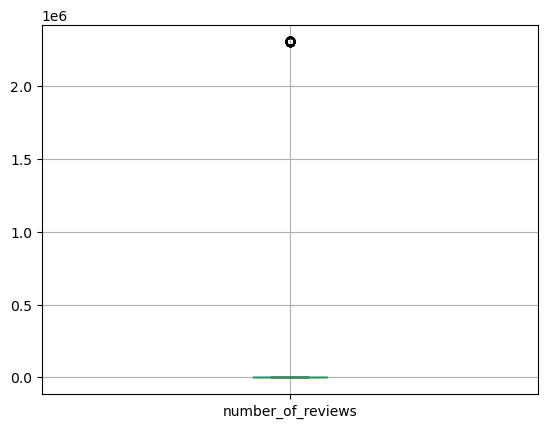

In [36]:
product_features.boxplot(['number_of_reviews'])

<span style = 'color:blue'> So we can observe that the number of reviews column has some data which are outliers. We will now find the upper limit for this column and remove all the data that are outliers and beyond the distribution for number of reviews. </span>

In [38]:
# Finding the quartile values, the inner quartile range and the upper limit for the distribution for number of reviews
q1 = product_features[['number_of_reviews']].quantile(0.25)
q3 = product_features[['number_of_reviews']].quantile(0.75)
iqr = q3-q1
upper_limit = (q3 + 1.5*iqr)
upper_limit

number_of_reviews    1375.125
dtype: float64

In [39]:
# Finding out the number of data rows that are outliers
len(product_features[(product_features['number_of_reviews'] > upper_limit.iloc[0])])

50

In [40]:
# Removing the outlier data points to get a refined data for product_features. Also converting the datatype of number_of_reviews to float so that we can scale it using MinMaxScaler
product_features = product_features[~(product_features['number_of_reviews'] > upper_limit.iloc[0])]
product_features['number_of_reviews'] = product_features['number_of_reviews'].astype(float)
product_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         950 non-null    int64  
 1   category           950 non-null    object 
 2   on_sale            950 non-null    bool   
 3   number_of_reviews  950 non-null    float64
 4   avg_review_score   950 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 38.0+ KB


In [41]:
# Checking for duplicate product id records
product_features["product_id"].duplicated().sum() # 0 means no duplicate product records

0

<span style = 'color:blue'> Converting 'on_sale' from boolean to integer </span>

In [43]:
# Converting 'on_sale' from boolean to integer
product_features["on_sale"] = product_features["on_sale"].astype(int)

<span style = 'color:blue'> Creating dummy variables for the category column </span>

In [45]:
category_dummy = pd.get_dummies(product_features["category"], dtype = int, prefix = 'cat')
category_dummy

,cat_body,cat_foot,cat_fragrance,cat_hair,cat_hand,cat_makeup,cat_men_fragrance,cat_men_skincare,cat_nail,cat_skincare,cat_tools
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,0,0,0,0
997,0,1,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,1,0,0,0,0,0


<span style = 'color:blue'> Combining the dummy variables for category column to the product_features dataframe and removing category column </span>

In [47]:
# Combining the category_dummy with product_features dataframe and removing category column
product_features = product_features.join(category_dummy)
product_features = product_features.drop("category", axis = 1)
product_features.head()

,product_id,on_sale,number_of_reviews,avg_review_score,cat_body,cat_foot,cat_fragrance,cat_hair,cat_hand,cat_makeup,cat_men_fragrance,cat_men_skincare,cat_nail,cat_skincare,cat_tools
0,1134,0,101.0,3.349452,0,0,0,0,0,0,0,0,0,0,1
1,1846,0,111.0,5.000000,0,0,0,0,0,0,0,0,0,1,0
2,1762,0,220.0,4.882706,0,0,1,0,0,0,0,0,0,0,0
3,1254,1,446.0,5.000000,0,0,0,1,0,0,0,0,0,0,0
4,1493,1,513.0,-1.000000,1,0,0,0,0,0,0,0,0,0,0


<span style = 'color:blue'> We see that the range of reviews span from 66 to 2.3 million. This is a wide range and could lead to the models unwantedly giving more weightage to the number of reviews. Additionally for this column to be used in neural networks, we need to keep the range between 0 and 1. Hence we will use MinMaxScaler to bring the whole range within 0 and 1 so that it could be similar to the other columns </span>

In [49]:
# Scaling the number of reviews using MinMaxScaler to avoid any huge variation in numbers which can lead to unwanted results
product_features.loc[:, ["number_of_reviews"]] = MinMaxScaler().fit_transform(product_features.loc[:, ["number_of_reviews"]])
product_features.describe()

,product_id,on_sale,number_of_reviews,avg_review_score,cat_body,cat_foot,cat_fragrance,cat_hair,cat_hand,cat_makeup,cat_men_fragrance,cat_men_skincare,cat_nail,cat_skincare,cat_tools
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,1497.295789,0.650526,0.485296,2.682896,0.095789,0.121053,0.074737,0.105263,0.103158,0.125263,0.074737,0.100000,0.072632,0.072632,0.054737
std,288.283006,0.477055,0.291592,1.751986,0.294457,0.326360,0.263105,0.307054,0.304325,0.331191,0.263105,0.300158,0.259667,0.259667,0.227586
min,1000.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1247.250000,0.000000,0.228288,1.451847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1497.500000,1.000000,0.473325,2.802672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1745.750000,1.000000,0.741625,4.195297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1999.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style = 'color:blue'> __Data processing of 'Click History' file__</span>

In [51]:
# Loading click_history csv into a dataframe
click_history = pd.read_csv("click_history.csv")
click_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     35990 non-null  int64
 1   product_id  35990 non-null  int64
 2   clicked     35990 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 597.6 KB


In [52]:
click_history.duplicated().sum() # 0 means no duplicates

0

<span style = 'color:blue'> __Observation:__ </span>
* <span style = 'color:blue'> No null values present in the dataset </span>
* <span style = 'color:blue'> No duplicate values present </span>
* <span style = 'color:blue'> Clicked is a boolean which needs to be converted to numeric value </span>

In [54]:
click_history["clicked"] = click_history["clicked"].astype(int)
click_history.head()

,user_id,product_id,clicked
0,104863,1350,0
1,108656,1321,1
2,100120,1110,0
3,104838,1443,1
4,107304,1397,1


<span style = 'color:blue'> __Combining files into 1 dataframe__</span>

In [56]:
# Combining User Feature dataset with Click History dataset
user_click_combo = pd.merge(user_features, click_history, on = 'user_id')
# Combining user_click_combo with product_features dataset for final dataset
final_data = pd.merge(user_click_combo, product_features, on = 'product_id')

In [57]:
# Reordering the columns to keep user_id and product_id at the beginning as they are not important for the model as our models should be independent of user_id and product_id values
cols = list(final_data.columns)
cols = ['user_id',
        'product_id',
 'number_of_clicks_before',
 'ordered_before',
 'int_body',
 'int_foot',
 'int_fragrance',
 'int_hair',
 'int_hand',
 'int_makeup',
 'int_men_fragrance',
 'int_men_skincare',
 'int_nail',
 'int_skincare',
 'int_tools',
 'on_sale',
 'number_of_reviews',
 'avg_review_score',
 'cat_body',
 'cat_foot',
 'cat_fragrance',
 'cat_hair',
 'cat_hand',
 'cat_makeup',
 'cat_men_fragrance',
 'cat_men_skincare',
 'cat_nail',
 'cat_skincare',
 'cat_tools',
 'clicked']
final_data = final_data[cols]
final_data.head()

,user_id,product_id,number_of_clicks_before,ordered_before,int_body,int_foot,int_fragrance,int_hair,int_hand,int_makeup,...,cat_fragrance,cat_hair,cat_hand,cat_makeup,cat_men_fragrance,cat_men_skincare,cat_nail,cat_skincare,cat_tools,clicked
0,104939,1212,2,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,104939,1163,2,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,104939,1687,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,104939,1569,2,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,104939,1195,2,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1


---

### <span style = 'color: red'> Question 3: Model Generation and Evaluation </span>
* Please split the data into train and test sets with a ratio of 0.7:0.3. Build and optimize the classification models you learned in this course.

#### <span style = 'color : green'> Answer 3: </span>
* <span style = 'color: blue'> The classification models that will be used for model generation and subsequent comparison to find the best model are:
  > * Logistic Regression 
  > * Naive Bayes 
  > * Decision Tree
  > * Neural Network
  > * Support Vector Classification
  > * Random Forests
  > * AdaBoost</span>


<span style = 'color: blue'> Before we start with different models, it would be a good idea to check the correlation of the different variables with the column 'clicked' </span>

In [62]:
final_data.iloc[:, 2:].corr()['clicked']

number_of_clicks_before    0.018271
ordered_before             0.131130
int_body                   0.026118
int_foot                   0.018108
int_fragrance              0.030675
int_hair                   0.014916
int_hand                   0.027710
int_makeup                 0.022134
int_men_fragrance          0.028375
int_men_skincare           0.027212
int_nail                   0.032203
int_skincare               0.018025
int_tools                  0.030973
on_sale                    0.124363
number_of_reviews         -0.148604
avg_review_score          -0.050284
cat_body                   0.005603
cat_foot                   0.061772
cat_fragrance             -0.045457
cat_hair                   0.006924
cat_hand                   0.004344
cat_makeup                 0.044596
cat_men_fragrance         -0.018495
cat_men_skincare           0.063472
cat_nail                  -0.062791
cat_skincare              -0.045142
cat_tools                 -0.063578
clicked                    1

<span style = 'color: blue'> __Observation:__ We find that the most important factors for clicking on an advertisement seems to be the following factors: </span>
> * the number of reviews for the product
> * whether the same product has been ordered before
> * if the product is on sale

<span style = 'color: blue'> <br> Let's now create different models and see how well other models are able to predict whether an advertisement would be clicked or not. </span>

<span style = 'color: blue'> __Classification of Clicked Data:__ We can now check the classification of data under 'clicked' column to understand if we have a data where the clicked counts are in majority or minority because that will help us determining the appropriate metrics to be used as well.</span>

In [65]:
final_data.clicked.value_counts()

clicked
0    22176
1    12044
Name: count, dtype: int64

<span style = 'color: blue'> __Metrics for comparison:__ As we can see the population of clicked values is in the minority, we will use the following metrics: </span>
> * recall_score
> * f1_score
> * roc_auc_score.

<span style = 'color: blue'> __Training and Test data split__ </span>

<span style = 'color: blue'> In order to split it into training and test data, we would have to consider the independent variables as all the rows except the following - clicked (dependent variable), user_id, product_id. The reason for removing user_id and product_id is the values in them are not determinant to whether an advertisement would be clicked or not. User ID is an identification of an individual and we need to analyze what are the interests and behavior which lead to individuals clicking on advertisement or not. Similarly, Product ID is an identification for a product whereas we need to analyze and find the characteristics associated with a product that lead to an advertisement being clicked. </span>

In [68]:
X = final_data.drop(columns = ['user_id', 'product_id', 'clicked'])
y = final_data['clicked']
X.shape, y.shape

((34220, 27), (34220,))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [70]:
# Create a dataframe to store all the results for easier comparison along with the execution time for each model
model_compare = pd.DataFrame(columns = ['model_name', 'recall_score', 'f1_score', 'roc_auc_score', 'execution_time'])

<span style = 'color: blue'> __1. Logistic Regression__ </span>

In [72]:
start_time = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76      6579
           1       0.47      0.17      0.25      3687

    accuracy                           0.63     10266
   macro avg       0.56      0.53      0.50     10266
weighted avg       0.59      0.63      0.57     10266



In [74]:
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

In [75]:
result_row = ['Logistic Regression', recall, f1, roc, execution_time]
model_compare.loc[len(model_compare)] = result_row
model_compare

,model_name,recall_score,f1_score,roc_auc_score,execution_time
0,Logistic Regression,0.169515,0.248905,0.530798,0.039813


In [76]:
perm_imp = permutation_importance (lr, X_test, y_test, random_state = 42)
df_imp = pd.DataFrame({"features": X_train.columns, "mean": perm_imp.importances_mean, "stddev": perm_imp.importances_std})
df_imp.loc[df_imp["mean"].idxmax()]

features    ordered_before
mean              0.015176
stddev            0.000843
Name: 1, dtype: object

<span style = 'color:blue'> __Observation:__ As per Logistic Regression, __ordered_before__ is the most important feature. </span>

<span style = 'color: blue'> __2. Naive Bayes__ </span>

In [79]:
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70      6579
           1       0.50      0.64      0.56      3687

    accuracy                           0.64     10266
   macro avg       0.63      0.64      0.63     10266
weighted avg       0.67      0.64      0.65     10266



In [81]:
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

In [82]:
result_row = ['Naive Bayes', recall, f1, roc, execution_time]
model_compare.loc[len(model_compare)] = result_row
model_compare

,model_name,recall_score,f1_score,roc_auc_score,execution_time
0,Logistic Regression,0.169515,0.248905,0.530798,0.039813
1,Naive Bayes,0.641172,0.561921,0.640999,0.023359


In [83]:
perm_imp = permutation_importance (nb, X_test, y_test, random_state = 42)
df_imp = pd.DataFrame({"features": X_train.columns, "mean": perm_imp.importances_mean, "stddev": perm_imp.importances_std})
df_imp.loc[df_imp["mean"].idxmax()]

features    number_of_reviews
mean                 0.069823
stddev               0.001852
Name: 14, dtype: object

<span style = 'color:blue'> __Observation:__ As per Naive Bayes Classifier, __number of reviews__ is the most important feature. </span>

<span style = 'color: blue'> __3. Decision Tree__ </span>

In [86]:
start_time = time.time()
dt = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6579
           1       0.65      0.61      0.63      3687

    accuracy                           0.74     10266
   macro avg       0.72      0.71      0.72     10266
weighted avg       0.74      0.74      0.74     10266



In [88]:
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

In [89]:
result_row = ['Decision Tree', recall, f1, roc, execution_time]
model_compare.loc[len(model_compare)] = result_row
model_compare

,model_name,recall_score,f1_score,roc_auc_score,execution_time
0,Logistic Regression,0.169515,0.248905,0.530798,0.039813
1,Naive Bayes,0.641172,0.561921,0.640999,0.023359
2,Decision Tree,0.613507,0.631491,0.714414,0.093024


In [90]:
perm_imp = permutation_importance (dt, X_test, y_test, random_state = 42)
df_imp = pd.DataFrame({"features": X_train.columns, "mean": perm_imp.importances_mean, "stddev": perm_imp.importances_std})
df_imp.loc[df_imp["mean"].idxmax()]

features    number_of_reviews
mean                 0.180674
stddev               0.004452
Name: 14, dtype: object

<span style = 'color:blue'> __Observation:__ As per Decicision Tree Classifier, __number of reviews__ is the most important feature. </span>

<span style = 'color: blue'> __4. Neural Network__ </span>

In [93]:
start_time = time.time()
nn = MLPClassifier(max_iter = 2000) # default solver is 'adam' which works well for large datasets
nn.fit(X_train, y_train)
nn.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6579
           1       0.65      0.61      0.63      3687

    accuracy                           0.74     10266
   macro avg       0.72      0.71      0.72     10266
weighted avg       0.74      0.74      0.74     10266



In [95]:
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

In [96]:
result_row = ['Neural Network', recall, f1, roc, execution_time]
model_compare.loc[len(model_compare)] = result_row
model_compare

,model_name,recall_score,f1_score,roc_auc_score,execution_time
0,Logistic Regression,0.169515,0.248905,0.530798,0.039813
1,Naive Bayes,0.641172,0.561921,0.640999,0.023359
2,Decision Tree,0.613507,0.631491,0.714414,0.093024
3,Neural Network,0.613507,0.631491,0.714414,27.587072


In [97]:
perm_imp = permutation_importance (nn, X_test, y_test, random_state = 42)
df_imp = pd.DataFrame({"features": X_train.columns, "mean": perm_imp.importances_mean, "stddev": perm_imp.importances_std})
df_imp.loc[df_imp["mean"].idxmax()]

features    number_of_reviews
mean                 0.165225
stddev               0.001938
Name: 14, dtype: object

<span style = 'color:blue'> __Observation:__ As per Neural Network Classifier, __number of reviews__ is the most important feature. </span>

<span style = 'color: blue'> __5. Support Vector Classification__ </span>

<span style = 'color:blue'> For Support Vector Classification, we wanted to find the best parameters using Grid Search but it was really slow. Therefore, we will continue with kernel = 'rbf' create a model based on that.</span>

In [101]:
'''
tuned_params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"],
                "C" : [1.0, 10.0, 100.0, 1000.0],
                "degree" : [1, 2, 3, 4],
                "gamma" : ["scale", "auto"],
                "coef0" : [0.1, 0.5, 1.0, 1.5]}               

'''

'\ntuned_params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"],\n                "C" : [1.0, 10.0, 100.0, 1000.0],\n                "degree" : [1, 2, 3, 4],\n                "gamma" : ["scale", "auto"],\n                "coef0" : [0.1, 0.5, 1.0, 1.5]}               \n\n'

In [102]:
start_time = time.time()
model_svc = SVC(kernel = 'rbf')
model_svc.fit(X_train, y_train)
model_svc.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6579
           1       0.65      0.61      0.63      3687

    accuracy                           0.74     10266
   macro avg       0.72      0.71      0.72     10266
weighted avg       0.74      0.74      0.74     10266



In [104]:
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

In [105]:
result_row = ['Support Vector Classification', recall, f1, roc, execution_time]
model_compare.loc[len(model_compare)] = result_row
model_compare

,model_name,recall_score,f1_score,roc_auc_score,execution_time
0,Logistic Regression,0.169515,0.248905,0.530798,0.039813
1,Naive Bayes,0.641172,0.561921,0.640999,0.023359
2,Decision Tree,0.613507,0.631491,0.714414,0.093024
3,Neural Network,0.613507,0.631491,0.714414,27.587072
4,Support Vector Classification,0.613507,0.631491,0.714414,52.102149


<span style = 'color: blue'> __6. Random Forests__ </span>

In [107]:
'''
n_estimator = list(range (5, 101, 5))
min_samples_split = list(range(2,6,3))
min_samples_leaf = list(range(1,6,2))
tuned_params = {"n_estimators" : n_estimator,
                "criterion" : ["gini", "entropy", "log_loss"],
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,
                "max_features" : ["sqrt", "log2"]}
'''

'\nn_estimator = list(range (5, 101, 5))\nmin_samples_split = list(range(2,6,3))\nmin_samples_leaf = list(range(1,6,2))\ntuned_params = {"n_estimators" : n_estimator,\n                "criterion" : ["gini", "entropy", "log_loss"],\n                "min_samples_split" : min_samples_split,\n                "min_samples_leaf" : min_samples_leaf,\n                "max_features" : ["sqrt", "log2"]}\n'

In [108]:
'''
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, tuned_params, cv = 5, scoring = "recall")
grid_search.fit(X_train, y_train)
'''

'\nrfc = RandomForestClassifier()\ngrid_search = GridSearchCV(rfc, tuned_params, cv = 5, scoring = "recall")\ngrid_search.fit(X_train, y_train)\n'

In [109]:
start_time = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6579
           1       0.65      0.61      0.63      3687

    accuracy                           0.74     10266
   macro avg       0.72      0.71      0.72     10266
weighted avg       0.74      0.74      0.74     10266



In [111]:
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

In [112]:
result_row = ['Random Forests Classification', recall, f1, roc, execution_time]
model_compare.loc[len(model_compare)] = result_row
model_compare

,model_name,recall_score,f1_score,roc_auc_score,execution_time
0,Logistic Regression,0.169515,0.248905,0.530798,0.039813
1,Naive Bayes,0.641172,0.561921,0.640999,0.023359
2,Decision Tree,0.613507,0.631491,0.714414,0.093024
3,Neural Network,0.613507,0.631491,0.714414,27.587072
4,Support Vector Classification,0.613507,0.631491,0.714414,52.102149
5,Random Forests Classification,0.613507,0.631491,0.714414,3.616759


In [113]:
perm_imp = permutation_importance (rfc, X_test, y_test, n_repeats = 1, random_state = 42)
df_imp = pd.DataFrame({"features": X_train.columns, "mean": perm_imp.importances_mean, "stddev": perm_imp.importances_std})
df_imp.loc[df_imp["mean"].idxmax()]

features    number_of_reviews
mean                 0.143483
stddev                    0.0
Name: 14, dtype: object

<span style = 'color:blue'> __Observation:__ As per Random Forest Classifier, __number of reviews__ is the most important feature. </span>

<span style = 'color: blue'> __7. AdaBoost Classifier__ </span>

In [116]:
start_time = time.time()
abc = AdaBoostClassifier(algorithm = 'SAMME')
abc.fit(X_train, y_train)
abc.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6579
           1       0.65      0.61      0.63      3687

    accuracy                           0.74     10266
   macro avg       0.72      0.71      0.72     10266
weighted avg       0.74      0.74      0.74     10266



In [118]:
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

In [119]:
result_row = ['AdaBoost Classifier', recall, f1, roc, execution_time]
model_compare.loc[len(model_compare)] = result_row
model_compare

,model_name,recall_score,f1_score,roc_auc_score,execution_time
0,Logistic Regression,0.169515,0.248905,0.530798,0.039813
1,Naive Bayes,0.641172,0.561921,0.640999,0.023359
2,Decision Tree,0.613507,0.631491,0.714414,0.093024
3,Neural Network,0.613507,0.631491,0.714414,27.587072
4,Support Vector Classification,0.613507,0.631491,0.714414,52.102149
5,Random Forests Classification,0.613507,0.631491,0.714414,3.616759
6,AdaBoost Classifier,0.613507,0.631491,0.714414,1.022757


In [120]:
perm_imp = permutation_importance (abc, X_test, y_test, n_repeats = 1, random_state = 42)
df_imp = pd.DataFrame({"features": X_train.columns, "mean": perm_imp.importances_mean, "stddev": perm_imp.importances_std})
df_imp.loc[df_imp["mean"].idxmax()]

features    number_of_reviews
mean                 0.179622
stddev                    0.0
Name: 14, dtype: object

<span style = 'color:blue'> __Observation:__ As per AdaBoost Classifier, __number of reviews__ is the most important feature. </span>

<span style = 'color:blue'> I compared 7 different classification models and tried to optimize them using Grid Search but due to computing power limitations, the GridSearchCV didn't complete its computations after 20 minutes of computing. So, I completed the model evaluation through the standard parameters.</span>

---

### <span style = 'color:red'> Question 4: Assessment and Evaluation </span>

#### <span style = 'color:green'> Answer 4 </span>

* <span style = 'color:red'> Which model has the best performance? </span>

➡️ <span style = 'color:blue'> From my comparison, I could find that __Decision Tree__ is the classification model with the best performance because it had the best scores and it got them with the least execution time.</span>

* <span style = 'color:red'> What have you learned from the models you built? </span>

➡️ <span style = 'color:blue'> The choice of model should not be based on how modern and intricate it is and the amount of complexities it can handle but should be based on the data at hand. In this problem at hand, the Decision Tree was able to interpret the important factors for decision making and was able to perform at a faster rate than say an ensemble classifier like AdaBoost. Therefore, the best option is to try to run the data through multiple models and then decide the best among them. Additionally, I could find that each model considers different features of the dataset as the most important one and having that information would help one focus on the most important feature suggested by more models and allow teams to focus on improving that to get a higher click rate in advertisements. </span>

* <span style = 'color:red'> Why you chose to use that model rather than other ones (model strengths and weaknesses)? </span>

➡️ <span style = 'color:blue'> The reason why I would choose Decision Tree over AdaBoost Classifier in this case is the execution time and the interpretability of Decision Tree classifier. Decision Tree classifiers are easy to understand and once we are able to understand what are the factors that drive a particular decision, it is easier to put strategic focus on improving those for a higher success rate. Additionally, the good performance (accuracy and execution time wise) make Decision Tree a simple and effective model for this problem.</span>

* <span style = 'color:red'> How you know this a good recommendation for the stakeholders? </span>

➡️ <span style = 'color:blue'> The recall score, F1 score and roc auc score for Decision Tree is one among the highest scores between the tested classification models. That means it is able to predict whether a customer would actually click an advertisement better than others. It also provides us with a feature importance scores and we find that 'Number of reviews' for a product is the most important feature for a product to be either selected or rejected. This seems to be true considering our own behavior while shopping online. We as individuals do look for number of reviews to understand whether we should purchase a product or not. Whenever a customer leaves a review, they do that only when they feel really deeply about the product - positively or negatively. Therefore, reviews are an important metric to decide on purchasing a product as people tend to value the time someone else spent on giving a feedback about the product. Therefore, I would consider this a good recommendation for the stakeholders and stakeholders might strategize on how to improve the number of reviews on their product to make them more appealing to be bought by customers.</span>

* <span style = 'color:red'> What future steps would you take if you had more time? </span>

➡️ <span style = 'color:blue'> If I had more time, I would have run these models through GridSearch to find the best parameters for each of the models. I tried to carry out hyperparameter tuning for models but the models were too slow on my system to provide any result even after 20-30 minutes of run time. If I had more time, I would have tried to keep the programs running for an hour to see if I could get the best parameters for each of the ensemble classification models which might have provided me with a slightly better result than the Decision Tree one.</span>

* <span style = 'color:red'> If you were in the shoes of a stakeholder, what questions and critiques would you have of your own proposal in terms of the analytics or for business impact/implementation?  </span>

➡️ <span style = 'color:blue'> Here are the questions and critiques I might have as a stakeholder for this proposal: </span>
* <span style = 'color:blue'> Usually people tend to purchase the item they already know of or have used in the past. So, why do you not think that factor could have played a significant role instead of the number of reviews on a product? </span>
  > <span style = 'color:green'> My response - A majority of the products in this dataset were beauty products related and the beauty industry is in a constant mode of innovation. People tend to look for fast results and hence move on to the next highly marketed item if their previous product didn't satisfy their expectation. Even if the older product was good, people tend to try newer ones assuming it would be even better than the previous one. A lot of sales of beauty product is run through influencer marketing as well and products do get viral as well. Therefore, we can say that loyalty to a beauty product is not always present unless one has tried out all the available options. </span>
* <span style = 'color:blue'> Do you think your data is distributed enough against all the categories to provide us a correct response? Could it be that people prefer to read reviews for certain product types, say health related but would not read it for items like tools and would choose to purchase from their past history?
  > <span style = 'color:green'> My response - Yes it is highly likely that there might be imbalance in the dataset and my analysis is based on the sample size provided. If I am able to get my hands on a richer data, I might be able to get a different response or a more certain response.</span>
* <span style = 'color:blue'> Companies usually see a lot of sale during holiday season and thanksgiving when things are on sale. The perceived satisfaction of getting a good deal makes them purchase things more often during that period. But how is it that your data doesn't suggest 'on sale' as an important factor?</span>
  > <span style = 'color:green'> My response - As we have moved to a more digital version of shopping experience, we find that discounts and product sales run throughout the year. You have sales for every holiday during the year and even flash sales for sale periods within a day. Due to these high number of discount opportunities, customers do not feel missing out on a deal anymore during specific events like thanksgiving. People instead would try to look for the best product, setup price alerts and purchase them whenever they feel the price is suited as per their budget. Additionally, products like Buy Now Pay Later, Flexi Pay makes it easier for people to purchase things whenever they want rather than wait for sale events. Sure, in the macroeconomic context Sale events do bring in a lot of income but may be for this specific dataset which consists of fast moving consumer goods related to beauty, the discounts do not alter the behavior of people as much as buying a consumer electronics during sale would have. </span>

# <div style="text-align: center"> End of Assignment </div>